### Communicate with the Keithley DMM Array Plate Monitor and Take Data

1. Connect to the Keithley over local area network ethernet
2. Take current reading (voltage across 100 Ohm resistor)
    * Flick switch to current on array plate interface box
3. Take voltage reading (charge accumulated on floating pin of array plate)
    * Flick switch to voltage on array plate interface box
4. Append readings in the form of a dictionary to a list
5. Repeat until all data is taken
6. Save data to json file
7. Disconnect Keithley to release the socket so other programs can use it


### Use the following cells to take data

In [95]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)

<module 'ArrayPlateLogger' from 'C:\\Users\\matt_\\Documents\\GitHub\\ArrayPlateKeithleyLogger\\ArrayPlateLogger.py'>

In [42]:
apl.disconnectVisa() # If you lose communications with the Keithley, run this.

In [39]:
data = apl.arrayPlateMeasurement()
data.connect()

KEITHLEY INSTRUMENTS INC.,MODEL 2701,4368285,D05  /A02  


### Run the following cell just to get a quick reading

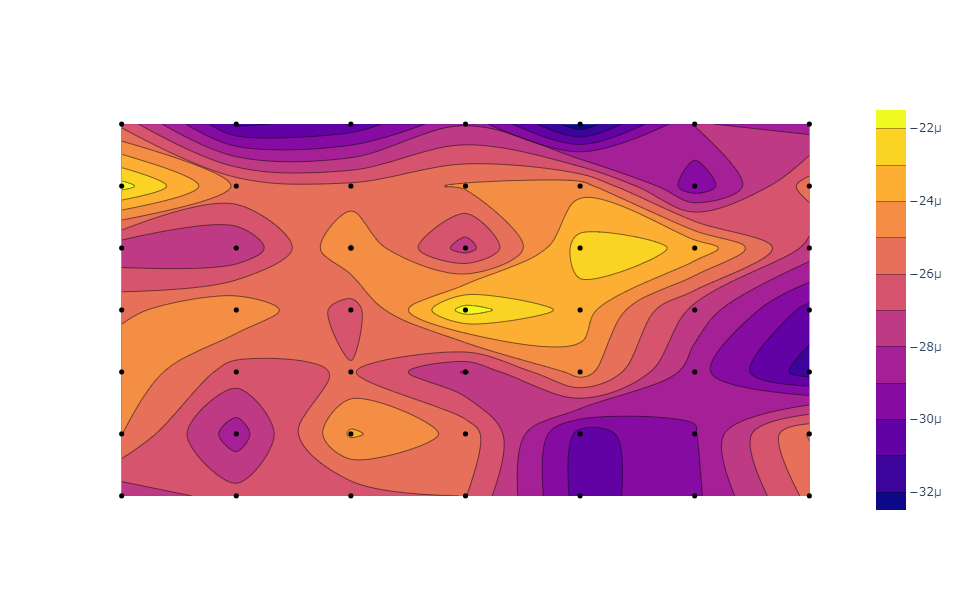

In [41]:
currents = data.readCurrents()
apl.plotI(currents)

### Run following cell to add data to list of dictionaries

Number of entries: 11


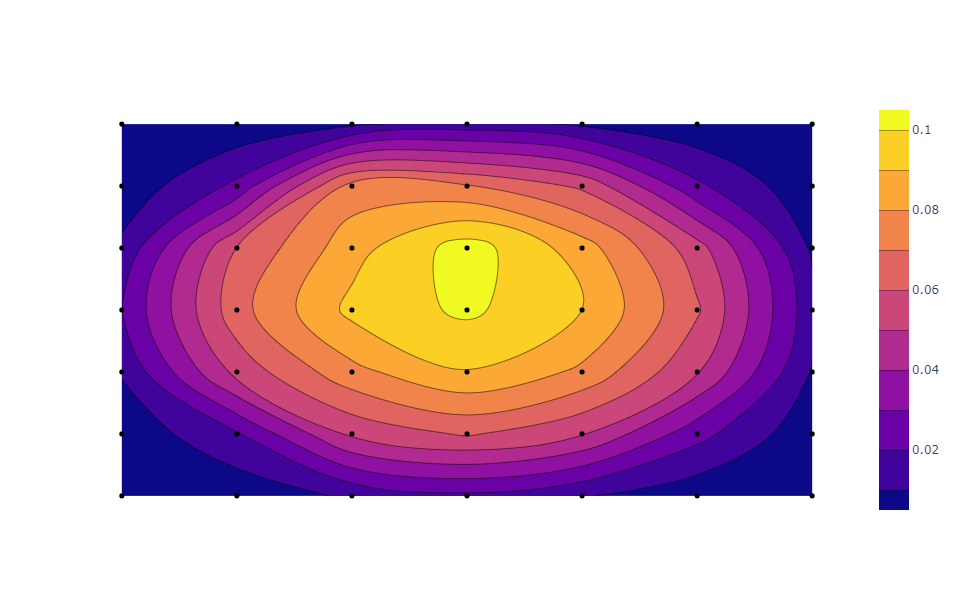

In [23]:
currents = data.readCurrents()
# apl.plotI(currents)
data.append(
    pressure = 1.4e-4,
    Vbias = 162,
    Ibias = -.08,
    Varc = 77.7,
    Iarc = 4.38,
    Vext = 120,
    Iext = 200.0,
    Ibase = 9.58,
    currents = currents,
    note = 'Increasing Vext only.'
)
data.plotI()

In [24]:
data.save('data')

In [25]:
data.disconnect()

### Use the following cells to look at the data

* I didn't get much data because the filament was failing and gave up during the penultimate run.
* The current hitting the baseplate and the fluorescence visible in the chamber was highly dependent on the gas pressure.
* I am not convinced that the bias current is representative of typical running conditions because the filament was failing and will have had a hot spot.
* I varied the bias voltage and extraction voltage but because the extraction voltage was actually set positive, the bias voltage was highly coupled to it and floated up to always be 5 to 10 V more positive than the voltage on the extractor.
* Need at least + 100 V bias/extraction V or ion current is not centralised on the array plate.

In [1]:
# data = apl.arrayPlateMeasurement()
# data.load("data_201117_112624.json")

import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)
savedData = apl.arrayPlateMeasurement()
savedData.load("data_201123_151552.json")
# savedData.exportCSV('data_201123_151552')

4 entries loaded.


,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
0,201123_151127,125,2.8,-9200,0.4,72.5,1.4,0.014,0.00009,


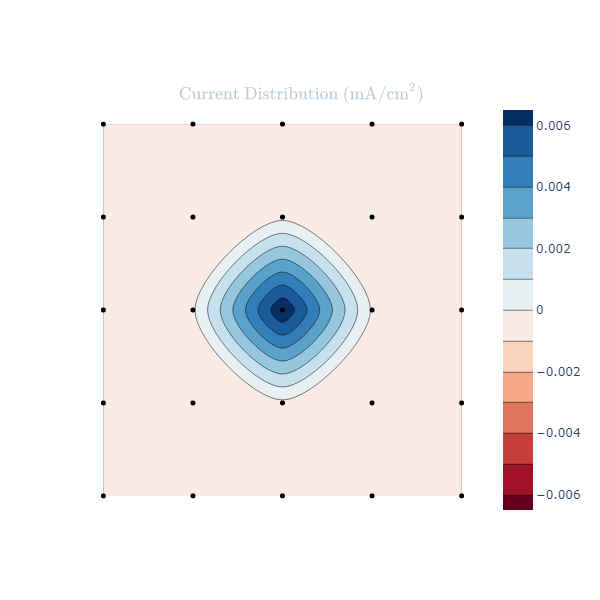

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
1,201123_151312,125,2.2,-9030,0.3,72.5,1.38,0.028,0.000065,


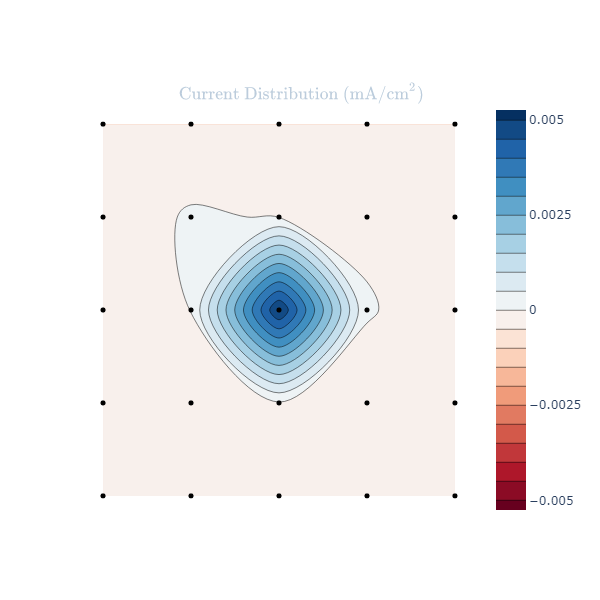

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
2,201123_151417,125,3.9,-9030,0.6,72.5,1.59,0.002,0.00013,


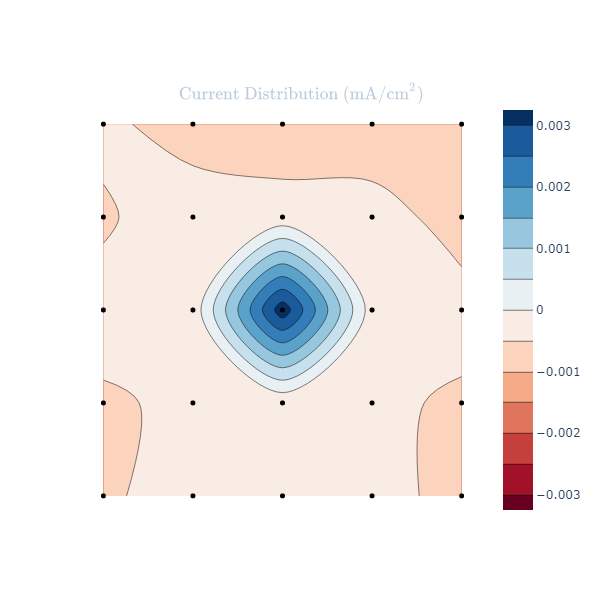

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
3,201123_151537,125,4.0,-9030,0.6,72.5,1.59,0.011,0.00013,


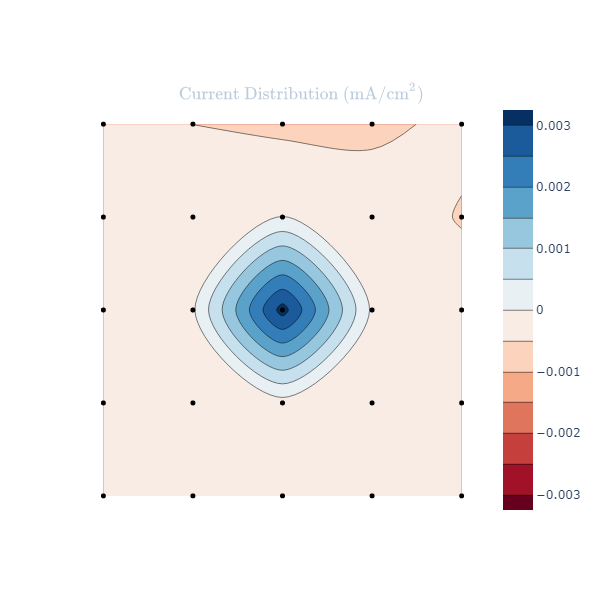

In [3]:
# conda install -c plotly plotly-orca
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
from IPython.display import Image
df = pd.DataFrame(savedData.data)
df = df[['time', 'Vbias', 'Ibias', 'Vext', 'Iext', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]

for i in range(savedData.len()):
    display(df[i:i+1])
    fig = savedData.plotI(i)
#     fig = savedData.plotI(savedData.data[i]['currents'])
    display(Image(pio.to_image(fig, format='png'))) # use this to have static graphs render on github.
#     fig.show()